In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D   
from keras.layers import Flatten   
from keras.layers import Dense        
from keras.layers import Dropout
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout

In [3]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')])

In [4]:
# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       

In [5]:
image_size =150
input_image = [] 
path1=r"C:\Users\RupesH\Desktop\FINAL CAPSTONE\chest_xray"
cate=['NORMAL', 'PNEUMONIA']   

for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size  , image_size) ) 
        input_image.append([image_array , label])

In [6]:
image_array.shape

(150, 150, 3)

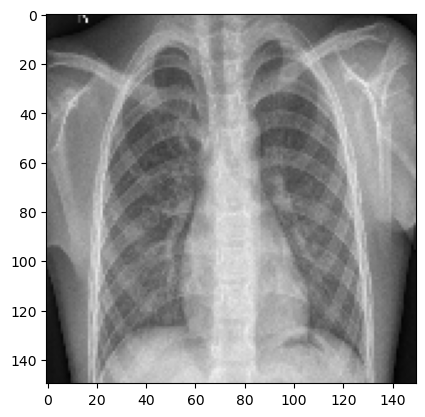

In [7]:
plt.imshow(input_image[11][0])  ## Checking if image has loaded correctly

In [8]:
np.random.shuffle(input_image)   # shuffle -----random sampling

In [9]:
print('Size of data/ number of images:',len(input_image))

Size of data/ number of images: 5856


In [10]:
X=[]
Y=[]

for img, label in input_image:
    X.append(img)
    Y.append(label)

In [11]:
print('Labels in data:',set(Y),'--->',cate)

Labels in data: {0, 1} ---> ['NORMAL', 'PNEUMONIA']


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X= X/255

In [14]:
from sklearn.model_selection import train_test_split

train_x,test_x, train_y, test_y = train_test_split(X,Y, test_size=.2)

train_y= to_categorical(train_y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((4684, 150, 150, 3), (4684, 2), (1172, 150, 150, 3), (1172,))

In [15]:
result = model.fit(x=train_x, y=train_y, epochs=10, validation_split=0.2 )

Epoch 1/10


118/118 [==============================] - 90s 722ms/step - loss: 0.4594 - accuracy: 0.7817 - val_loss: 0.2961 - val_accuracy: 0.8655
Epoch 2/10
118/118 [==============================] - 86s 732ms/step - loss: 0.2432 - accuracy: 0.9005 - val_loss: 0.1438 - val_accuracy: 0.9424
Epoch 3/10
118/118 [==============================] - 77s 656ms/step - loss: 0.2007 - accuracy: 0.9215 - val_loss: 0.1327 - val_accuracy: 0.9498
Epoch 4/10
118/118 [==============================] - 77s 649ms/step - loss: 0.1736 - accuracy: 0.9341 - val_loss: 0.1928 - val_accuracy: 0.9264
Epoch 5/10
118/118 [==============================] - 76s 644ms/step - loss: 0.1804 - accuracy: 0.9317 - val_loss: 0.1553 - val_accuracy: 0.9381
Epoch 6/10
118/118 [==============================] - 77s 650ms/step - loss: 0.1389 - accuracy: 0.9461 - val_loss: 0.0996 - val_accuracy: 0.9605
Epoch 7/10
118/118 [==============================] - 76s 641ms/step - loss: 0.1275 - accuracy: 0.9538 - val_loss: 0.1095 - val_

In [16]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [17]:
model.save('c_xray2.h5')  # Save the model for predictions

In [18]:
model = load_model("c_xray2.h5")

In [19]:
pred_prob = model.predict(test_x)
pred = pred_prob.argmax(axis=1)

37/37 [==============================] - 5s 138ms/step


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_tab = confusion_matrix(test_y, pred)
confusion_tab

array([[256,  22],
       [ 10, 884]], dtype=int64)

In [21]:
print("Accuracy on Test Data",round(accuracy_score(test_y, pred)*100,2),"%")

Accuracy on Test Data 97.27 %


In [22]:
from sklearn.metrics import classification_report, recall_score,precision_score, f1_score

In [23]:
print("Classification Report",
      classification_report(test_y, pred))

Classification Report               precision    recall  f1-score   support

           0       0.96      0.92      0.94       278
           1       0.98      0.99      0.98       894

    accuracy                           0.97      1172
   macro avg       0.97      0.95      0.96      1172
weighted avg       0.97      0.97      0.97      1172



In [24]:
recall = recall_score(test_y, pred)*100
print(round(recall,2),"%")

98.88 %


In [25]:
precision = precision_score(test_y, pred)*100
print(round(precision,2),"%")

97.57 %


In [26]:
f1__score = f1_score(test_y, pred)*100
print(round(f1__score,2),"%")

98.22 %


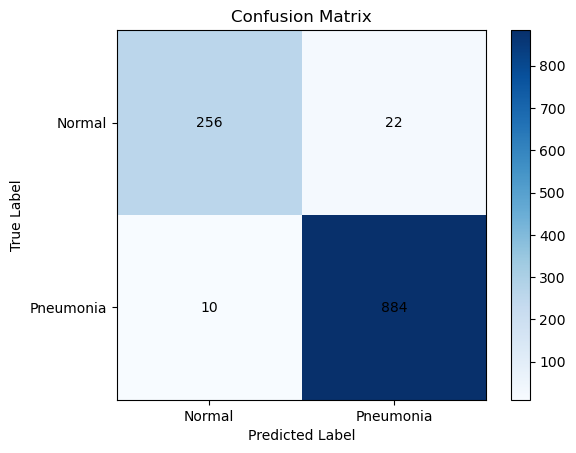

In [27]:
plt.imshow(confusion_tab, cmap='Blues', interpolation='nearest')
plt.colorbar()

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.yticks([0, 1], ['Normal', 'Pneumonia'])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_tab[i, j]), ha='center', va='center', color='black')

plt.show()
